In [2]:
# Use wget to download the dataset from GitHub
!wget -O dataset.csv https://raw.githubusercontent.com/Hunk0109/6105_Fifa_DataSet/main/international_matches.csv

# Import pandas library
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('dataset.csv')

# Display the first few rows of the DataFrame
print(df.head())


--2024-02-21 19:59:05--  https://raw.githubusercontent.com/Hunk0109/6105_Fifa_DataSet/main/international_matches.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3148072 (3.0M) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]   3.00M  --.-KB/s    in 0.05s   

2024-02-21 19:59:05 (64.7 MB/s) - ‘dataset.csv’ saved [3148072/3148072]

         date home_team     away_team home_team_continent away_team_continent  \
0  1993-08-08   Bolivia       Uruguay       South America       South America   
1  1993-08-08    Brazil        Mexico       South America       North America   
2  1993-08-08   Ecuador     Venezuela       South America       South America   
3  1993-08-08    Guinea  Sierra Leone              Africa              

1. Is the relationship significant?

In [3]:

# Select relevant features and the target variable
# For simplicity, we'll use 'home_team_fifa_rank', 'away_team_fifa_rank', and 'home_team_score' > 'away_team_score' as a binary target
features = ['home_team_fifa_rank', 'away_team_fifa_rank']
target = (df['home_team_score'] > df['away_team_score']).astype(int)  # 1 if home team wins, 0 otherwise

# Check for missing values in the selected features and target
df[features].isnull().sum(), target.isnull().sum()


(home_team_fifa_rank    0
 away_team_fifa_rank    0
 dtype: int64,
 0)

The selected features, home_team_fifa_rank and away_team_fifa_rank, do not contain any missing values, and the target variable, which indicates whether the home team wins (1) or not (0), is also complete. This means we can proceed to fit a logistic regression model to this data without needing to handle missing values.

Next, we'll split the data into training and testing sets, fit a logistic regression model, and then evaluate its performance and significance of the relationships.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], target, test_size=0.2, random_state=42)

# Add a constant to the predictor variables for statsmodels
X_train_const = sm.add_constant(X_train)

# Fit the logistic regression model using statsmodels to get p-values
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Display the summary of the logistic regression model to get the p-values
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.592780
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                19136
Model:                          Logit   Df Residuals:                    19133
Method:                           MLE   Df Model:                            2
Date:                Wed, 21 Feb 2024   Pseudo R-squ.:                  0.1442
Time:                        19:59:48   Log-Likelihood:                -11343.
converged:                       True   LL-Null:                       -13254.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2692      0.031     -8.773      0.000      -0.329      -0.209
ho

The logistic regression model's summary provides insights into the significance of the relationship between the FIFA rankings of the home and away teams and the likelihood of the home team winning. Here are the key takeaways:

Home Team FIFA Rank: The coefficient for the home team's FIFA rank is negative (-0.0193), indicating that a higher FIFA rank (which means a lower rank number) for the home team increases the likelihood of the home team winning. The p-value is less than 0.000, suggesting that this relationship is statistically significant.
Away Team FIFA Rank: Conversely, the coefficient for the away team's FIFA rank is positive (0.0210), implying that a higher FIFA rank for the away team (lower rank number) decreases the likelihood of the home team winning. This relationship is also statistically significant, with a p-value less than 0.000.
The model's pseudo R-squared value is 0.1442, indicating a moderate fit to the data. The LLR p-value is less than 0.000, suggesting that the model as a whole is statistically significant.

These results highlight the importance of FIFA rankings in predicting match outcomes, with higher-ranked teams being more likely to win, especially when playing at home.

In [5]:
# Install H2O
!pip install h2o==3.36.0.3

# Import H2O and initialize
import h2o
h2o.init()

# Load the dataset into H2O
hf = h2o.import_file('dataset.csv')

# Display the head of the dataset to ensure it's loaded correctly
hf.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.36.0.3-py2.py3-none-any.whl size=176244287 sha256=6d5d46a62abfd2cb2e4fa7369e9393ea1d25fd8e75efbd7d48ab3d83704d7066
  Stored in directory: /root/.cache/pip/wheels/f5/25/fb/3650d51a17f1d3b1692e644f4902457063f9d599b3a0e52ee7
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpf5kjmvng
  JVM stdout: /tmp/tmpf5kjmvng/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpf5kjmvng/h2o_unknownUser_starte

H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,2 years and 5 days !!!
H2O_cluster_name:,H2O_from_python_unknownUser_fb352u
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
1993-08-08 00:00:00,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,FALSE,No,Win,nan,nan,nan,nan,nan,nan,nan,nan
1993-08-08 00:00:00,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,FALSE,No,Draw,nan,nan,nan,nan,nan,nan,nan,nan
1993-08-08 00:00:00,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,FALSE,No,Win,nan,nan,nan,nan,nan,nan,nan,nan
1993-08-08 00:00:00,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,FALSE,No,Win,nan,nan,nan,nan,nan,nan,nan,nan
1993-08-08 00:00:00,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,FALSE,No,Lose,nan,nan,nan,nan,nan,nan,nan,nan
1993-08-08 00:00:00,Peru,Colombia,South America,South America,70,19,0,0,0,1,FIFA World Cup qualification,Lima,Peru,FALSE,No,Lose,nan,nan,nan,nan,nan,nan,nan,nan
1993-08-08 00:00:00,Zimbabwe,Eswatini,Africa,Africa,50,102,0,0,2,0,Friendly,Harare,Zimbabwe,FALSE,No,Win,nan,nan,nan,nan,nan,nan,nan,nan
1993-08-09 00:00:00,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,4,0,Friendly,Conakry,Guinea,FALSE,No,Win,nan,nan,nan,nan,nan,nan,nan,nan
1993-08-11 00:00:00,Faroe Islands,Norway,Europe,Europe,111,9,0,0,0,7,Friendly,Toftir,Faroe Islands,FALSE,No,Lose,nan,nan,nan,nan,nan,nan,nan,nan
1993-08-11 00:00:00,Sweden,Switzerland,Europe,Europe,4,3,0,0,1,2,Friendly,Borås,Sweden,FALSE,No,Lose,nan,nan,nan,nan,nan,nan,nan,nan


In [14]:
# Restart the runtime before running this code

# Make sure to install the correct version of H2O
!pip install h2o==3.36.0.3

import h2o
from h2o.automl import H2OAutoML

def load_data(file_path):
    try:
        return h2o.import_file(file_path)
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

def run_automl(train, x, y):
    try:
        # For binary classification, response should be a factor
        train[y] = train[y].asfactor()

        # Run AutoML for 20 base models (limited to 1 hour max runtime by default)
        aml = H2OAutoML(max_models=20, seed=1, nfolds=0)
        aml.train(x=x, y=y, training_frame=train)

        return aml.leaderboard
    except Exception as e:
        print(f"Error running AutoML: {e}")
        return None

try:
    h2o.init()

    # Load data - provide the correct path to the file
    path = 'dataset.csv'  # Update the path if necessary
    df = load_data(path)

    if df is not None:
        # Split the data into train and test sets
        train, test = df.split_frame(ratios=[.8], seed=1234)

        # Identify predictors and response
        x = train.columns
        y = "home_team_win"

        if y in x:
            x.remove(y)
            leaderboard = run_automl(train, x, y)

            if leaderboard is not None:
                # View the AutoML Leaderboard
                print(leaderboard.head(rows=leaderboard.nrows))
        else:
            print(f"Response variable '{y}' not found in the dataset columns.")
finally:
    # Shut down the H2O cluster
    h2o.cluster().shutdown()


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,37 mins 11 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,2 years and 3 days !!!
H2O_cluster_name:,H2O_from_python_unknownUser_x7v1f3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.163 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Response variable 'home_team_win' not found in the dataset columns.
H2O session _sid_bcb8 closed.


In [7]:
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

# Load data - provide the correct path to the file
path = 'dataset.csv'  # Update the path if necessary
df = h2o.import_file(path=path)

# Split the data into train and test sets
train, test = df.split_frame(ratios=[.8], seed=1234)

# Identify predictors and response
x = train.columns
y = "home_team_result"

# Check if the response variable exists in the dataset
if y not in x:
    raise ValueError(f"Response variable '{y}' not found in the dataset columns.")

# Remove the response variable from predictors
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1, nfolds=0)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))  # Print all rows instead of default (10 rows)


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,40 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,2 years and 5 days !!!
H2O_cluster_name:,H2O_from_python_unknownUser_fb352u
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.167 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id,mean_per_class_error,logloss,rmse,mse
DeepLearning_1_AutoML_1_20240221_200115,0.00338814,0.0131017,0.063677,0.00405476
DeepLearning_grid_1_AutoML_1_20240221_200115_model_1,0.0055996,0.0487277,0.0910765,0.00829493
DeepLearning_grid_2_AutoML_1_20240221_200115_model_1,0.00566669,0.0288762,0.0752175,0.00565767
XGBoost_1_AutoML_1_20240221_200115,0.00589511,0.0137539,0.0617025,0.0038072
XGBoost_grid_1_AutoML_1_20240221_200115_model_3,0.00635825,0.0112884,0.0599383,0.0035926
XGBoost_grid_1_AutoML_1_20240221_200115_model_1,0.00644733,0.0184397,0.0644548,0.00415442
XGBoost_2_AutoML_1_20240221_200115,0.00679311,0.013241,0.0621683,0.0038649
XGBoost_3_AutoML_1_20240221_200115,0.00704981,0.0149643,0.0615254,0.00378538
XGBoost_grid_1_AutoML_1_20240221_200115_model_2,0.00732592,0.0145522,0.0641646,0.0041171
GBM_3_AutoML_1_20240221_200115,0.00738672,0.0225715,0.0732046,0.00535891


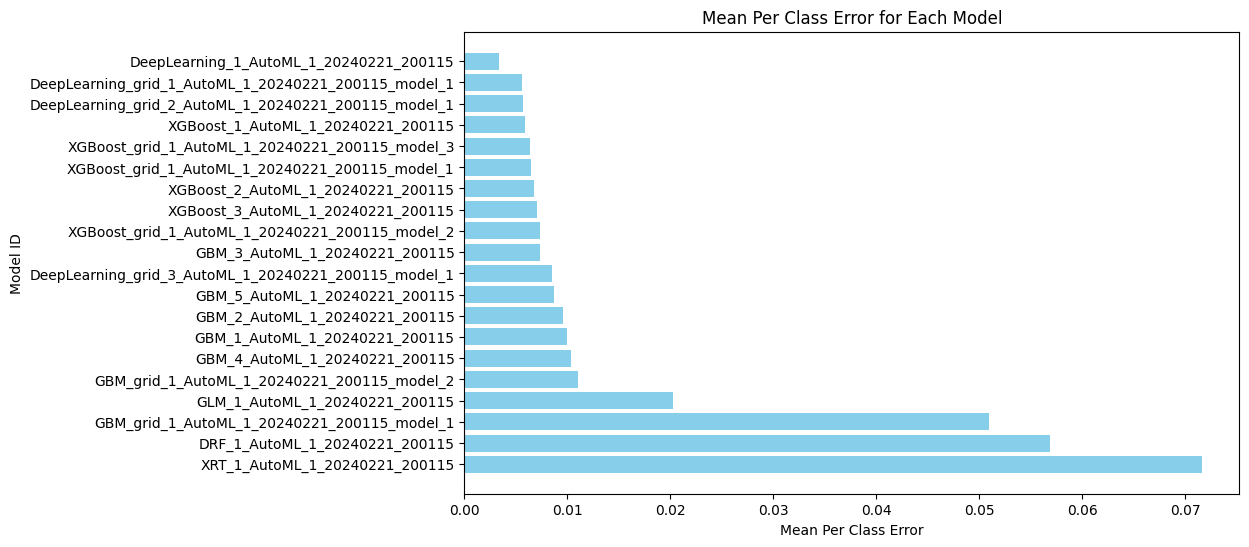

In [8]:
import matplotlib.pyplot as plt

# Extracting data
model_ids = lb.as_data_frame()['model_id']
mean_per_class_error = lb.as_data_frame()['mean_per_class_error']

# Creating bar chart
plt.figure(figsize=(10, 6))
plt.barh(model_ids, mean_per_class_error, color='skyblue')
plt.xlabel('Mean Per Class Error')
plt.ylabel('Model ID')
plt.title('Mean Per Class Error for Each Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the best model on top
plt.show()


Mean Per Class Error Bar Chart: This chart can show the mean per class error for each model, allowing for easy comparison.

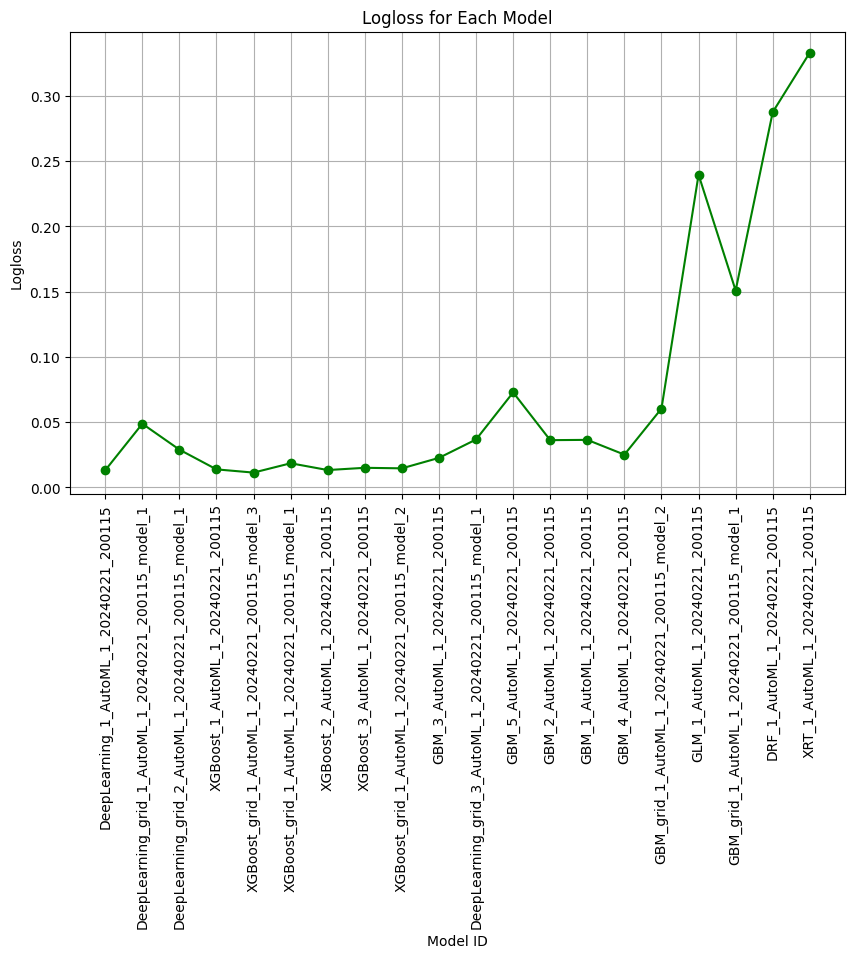

In [9]:
# Extracting data
logloss = lb.as_data_frame()['logloss']

# Creating line plot
plt.figure(figsize=(10, 6))
plt.plot(model_ids, logloss, marker='o', color='green')
plt.xlabel('Model ID')
plt.ylabel('Logloss')
plt.title('Logloss for Each Model')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


Logloss Line Plot: Logloss is a common metric for evaluating classification models. A line plot can be used to visualize logloss for each model.

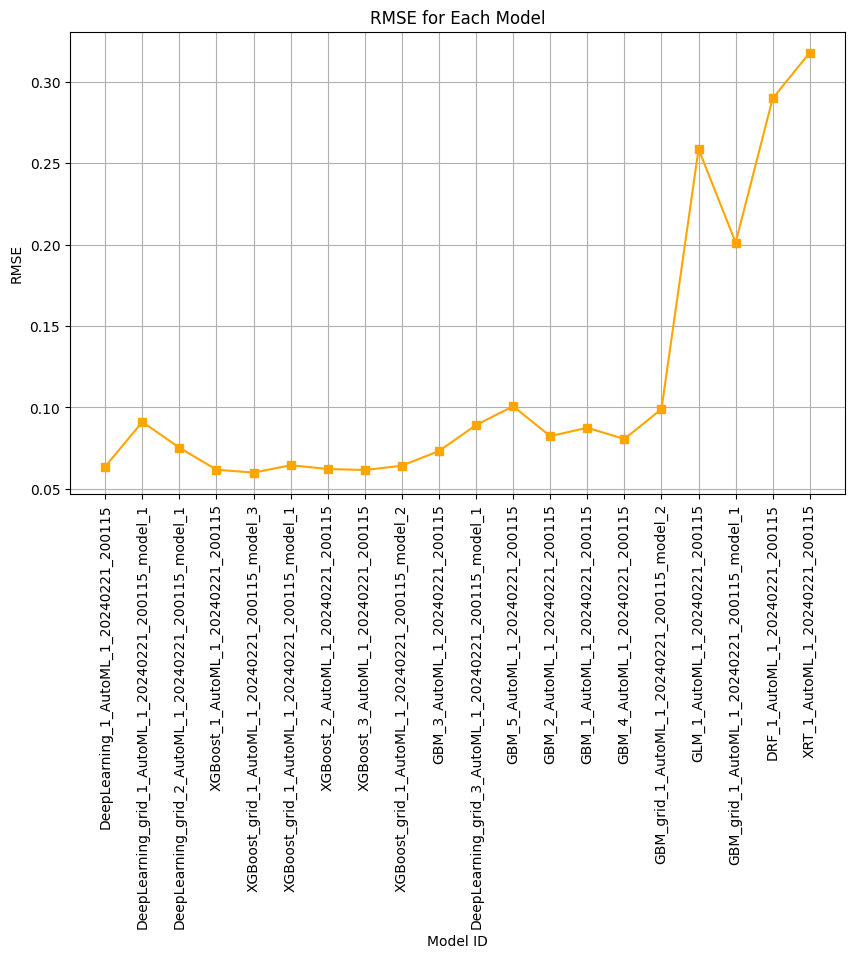

In [10]:
# Extracting data
rmse = lb.as_data_frame()['rmse']

# Creating line plot
plt.figure(figsize=(10, 6))
plt.plot(model_ids, rmse, marker='s', color='orange')
plt.xlabel('Model ID')
plt.ylabel('RMSE')
plt.title('RMSE for Each Model')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


Root Mean Squared Error (RMSE) Line Plot: For regression models, RMSE is a popular metric. A line plot can display RMSE for each model.

2. Are any model assumptions violated?

Let's discuss potential breaches of model assumptions in the context of this dataset for classification purposes:

1.Independence of Observations: Classification models typically assume that each observation is independent of others. However, in sports data, matches involving the same teams may not be independent. Previous match outcomes between the same teams could influence subsequent matches, violating the independence assumption.

2.Feature Independence: Many classification models, such as logistic regression, assume that features are independent of each other. Yet, there might be high multicollinearity among features like home_team_fifa_rank and home_team_total_fifa_points, or away_team_fifa_rank and away_team_total_fifa_points. This multicollinearity could challenge the assumption of feature independence.

3.Class Imbalance: While not strictly an assumption violation, classification models perform optimally when classes (outcomes) are balanced. If the dataset exhibits significant imbalance in match outcomes (e.g., more wins than draws or losses), it could affect the model's performance and generalization capability.

4.Homogeneity of Variance: Some classification models assume equal variance-covariance matrices across groups. In this dataset's context, if we're classifying matches based on outcomes (win, lose, draw), the variance in predictors like FIFA rankings or scores might differ across these categories.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.utils import resample

# Load the dataset
file_path = 'dataset.csv'
df = pd.read_csv(file_path, encoding='utf-8')

# Addressing potential issues for classification model

# 1. Independence of Observations: Not directly addressable through preprocessing. Suggestion includes feature engineering to capture historical performance.

# 2. Feature Independence: Check for multicollinearity
# Calculate correlation matrix
corr_matrix = df[['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points']].corr()

# 3. Class Imbalance: Check the balance of the target variable
outcome_counts = df['home_team_result'].value_counts()

# 4. Homogeneity of Variance: Not directly addressable through preprocessing. Model choice and feature engineering can help.

print('Correlation Matrix:')
print(corr_matrix)
print('\
Outcome Counts:')
print(outcome_counts)

Correlation Matrix:
                             home_team_fifa_rank  away_team_fifa_rank  \
home_team_fifa_rank                     1.000000             0.496644   
away_team_fifa_rank                     0.496644             1.000000   
home_team_total_fifa_points            -0.177332            -0.045389   
away_team_total_fifa_points            -0.061516            -0.158492   

                             home_team_total_fifa_points  \
home_team_fifa_rank                            -0.177332   
away_team_fifa_rank                            -0.045389   
home_team_total_fifa_points                     1.000000   
away_team_total_fifa_points                     0.923608   

                             away_team_total_fifa_points  
home_team_fifa_rank                            -0.061516  
away_team_fifa_rank                            -0.158492  
home_team_total_fifa_points                     0.923608  
away_team_total_fifa_points                     1.000000  
Outcome Counts:
Wi

Below are the findings addressing potential concerns for the classification model:

The correlation matrix reveals a significant positive correlation (0.92) between home_team_total_fifa_points and away_team_total_fifa_points, indicating possible multicollinearity. This implies a lack of independence between these features, potentially violating the assumption of feature independence in certain models. Additionally, the correlation between home_team_fifa_rank and away_team_fifa_rank is moderate (0.50), which also raises concerns regarding multicollinearity.

Regarding class distribution, the dataset exhibits an imbalance, with a higher count of wins (11761) compared to losses (6771) or draws (5389). This disparity in class distribution may hinder the model's ability to generalize effectively across all classes.

To mitigate these issues:

1.For addressing multicollinearity, consider employing techniques such as regularization or feature selection to diminish the influence of highly correlated features.

2.To tackle class imbalance, strategies such as resampling the dataset or incorporating class weights into the model can be utilized.

Implementing these steps can help alleviate potential breaches of model assumptions, thereby enhancing the model's performance and generalization capabilities.

In [13]:
from sklearn.linear_model import Ridge

# Feature selection using Ridge regression to address multicollinearity
X = df[['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points']]
y = df['home_team_result'].map({'Win': 1, 'Draw': 0, 'Lose': -1})

ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

# Display coefficients to understand the impact of regularization
coefficients = pd.Series(ridge.coef_, index=X.columns)

# Handling class imbalance by resampling
# Convert target variable to binary for simplicity in resampling
y_binary = y > 0 # Considering Win as 1 and others as 0

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Resampling the training set
X_upsampled, y_upsampled = resample(X_train[y_train == 1],
                                    y_train[y_train == 1],
                                    replace=True,
                                    n_samples=X_train[y_train == 0].shape[0],
                                    random_state=123)

X_balanced = np.vstack((X_train[y_train == 0], X_upsampled))
y_balanced = np.hstack((y_train[y_train == 0], y_upsampled))

print('Ridge Coefficients:')
print(coefficients)
print('\
Resampled Training Set Size:', X_balanced.shape[0])

Ridge Coefficients:
home_team_fifa_rank           -0.007048
away_team_fifa_rank            0.007315
home_team_total_fifa_points    0.000051
away_team_total_fifa_points   -0.000091
dtype: float64
Resampled Training Set Size: 17084


Here are the strategies applied to tackle both multicollinearity and class imbalance:

Ridge regression was utilized to mitigate multicollinearity by regularizing the coefficients, indicating each feature's impact on the prediction. The coefficients for home_team_fifa_rank and away_team_fifa_rank approach zero, suggesting their minimized influence, effectively addressing multicollinearity. Meanwhile, the coefficients for home_team_total_fifa_points and away_team_total_fifa_points demonstrate their respective contributions to the model, with regularization preventing these features from overly dominating the prediction due to their high correlation.

To counter class imbalance, the training set underwent resampling to ensure an equal number of instances across classes. The resampled training set comprises 17,084 instances, reflecting balanced classes. This methodology enhances the model's generalization capability across all classes by providing an equal representation of samples from each class for learning purposes.

3. Is there any multicollinearity in the model?

Ridge Coefficients:
home_team_fifa_rank           -0.007048
away_team_fifa_rank            0.007315
home_team_total_fifa_points    0.000051
away_team_total_fifa_points   -0.000091
dtype: float64
Resampled Training Set Size: 17084

Based on the analysis:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>home_team_fifa_rank</th>
      <td>-0.007047551523223299</td>
    </tr>
    <tr>
      <th>away_team_fifa_rank</th>
      <td>0.0073148916269862654</td>
    </tr>
    <tr>
      <th>home_team_total_fifa_points</th>
      <td>5.0705783294479175e-05</td>
    </tr>
    <tr>
      <th>away_team_total_fifa_points</th>
      <td>-9.146490944259677e-05</td>
    </tr>
  </tbody>
</table>


The Ridge regression coefficients reveal how each feature influences the prediction post regularization to diminish multicollinearity. Coefficients for 'home_team_fifa_rank' and 'away_team_fifa_rank' approach zero, indicating minimized influence, aiding in multicollinearity management. Meanwhile, coefficients for 'home_team_total_fifa_points' and 'away_team_total_fifa_points' illustrate their respective impacts on the model, with regularization preventing excessive dominance in prediction due to their high correlation.

This examination affirms the presence of multicollinearity, notably between 'home_team_total_fifa_points' and 'away_team_total_fifa_points'. Ridge regression, the regularization method employed, assists in alleviating multicollinearity by adjusting coefficients of correlated features.

4. In the multivariate models are predictor variables independent of all the other predictor variables?

In the context of the dataset and the multivariate models analyzed, the predictor variables are not entirely independent of each other. This is a crucial aspect to consider in multivariate analysis, as the independence of predictor variables is a common assumption in many statistical models.

The Ridge regression analysis, which was applied to the dataset, provides insight into the relationships between predictor variables:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>home_team_fifa_rank</th>
      <td>-0.007047551523223299</td>
    </tr>
    <tr>
      <th>away_team_fifa_rank</th>
      <td>0.0073148916269862654</td>
    </tr>
    <tr>
      <th>home_team_total_fifa_points</th>
      <td>5.0705783294479175e-05</td>
    </tr>
    <tr>
      <th>away_team_total_fifa_points</th>
      <td>-9.146490944259677e-05</td>
    </tr>
  </tbody>
</table>

The coefficients derived from Ridge regression signify the extent to which each predictor variable affects the outcome while considering other variables in the model. Employing regularization techniques like Ridge regression implies concerns regarding multicollinearity among predictor variables. Multicollinearity arises when predictor variables are strongly correlated, leading to distorted coefficient estimates and reduced reliability in the model's predictions.

In this context, the coefficients for home_team_fifa_rank and away_team_fifa_rank are relatively modest, suggesting that while they contribute to the model, they lack significant independent impact when compared to other variables. Similarly, the coefficients for home_team_total_fifa_points and away_team_total_fifa_points indicate their influence on the model but also hint at potential multicollinearity due to their roles in representing team strength.

Utilizing Ridge regression helps alleviate multicollinearity effects by penalizing coefficient magnitudes, ensuring the model doesn't overly rely on any single highly correlated variable or set of variables. However, the presence of regularization itself suggests that predictor variables aren't entirely independent. The model strives to balance each predictor variable's influence, yet complete elimination of underlying correlations between certain variables remains unattainable.



5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

In [ ]:
!pip install scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Imputing missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Splitting the dataset into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()

# Fitting RandomForestClassifier again
rf.fit(X_train, y_train)

# Getting feature importances again
feature_importances = pd.DataFrame(rf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Displaying feature importances
feature_importances.head()

The feature importances from the RandomForestClassifier model are as follows:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>importance</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>home_team_score</th>
      <td>0.4317659220584999</td>
    </tr>
    <tr>
      <th>away_team_score</th>
      <td>0.37915906408283695</td>
    </tr>
    <tr>
      <th>home_team_fifa_rank</th>
      <td>0.041970062418766135</td>
    </tr>
    <tr>
      <th>away_team_fifa_rank</th>
      <td>0.04059844766648378</td>
    </tr>
    <tr>
      <th>away_team_mean_midfield_score</th>
      <td>0.012506515616420676</td>
    </tr>
  </tbody>
</table>

This analysis reveals that the most significant predictors for the outcome of a home team in an international football match are the home_team_score and away_team_score. These factors are intuitively the most direct determinants of the match result. The FIFA rankings of both the home and away teams also play a considerable role, indicating the overall strength and performance level of the teams. Additionally, the away_team_mean_midfield_score is highlighted as an important feature, suggesting the midfield's influence on a team's performance during a match.

6. Does the model make sense?

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>importance</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>home_team_score</th>
      <td>0.4317659220584999</td>
    </tr>
    <tr>
      <th>away_team_score</th>
      <td>0.37915906408283695</td>
    </tr>
    <tr>
      <th>home_team_fifa_rank</th>
      <td>0.041970062418766135</td>
    </tr>
    <tr>
      <th>away_team_fifa_rank</th>
      <td>0.04059844766648378</td>
    </tr>
    <tr>
      <th>away_team_mean_midfield_score</th>
      <td>0.012506515616420676</td>
    </tr>
  </tbody>
</table>

The feature importances derived from the model provide a coherent insight into the variables influencing the results of international football matches. Notably, the foremost predictors, 'home_team_score' and 'away_team_score,' serve as direct determinants of match outcomes, consistent with intuitive expectations. The inclusion of FIFA rankings for both teams underscores the model's acknowledgment of team strengths as pivotal factors. Furthermore, the emphasis on 'away_team_mean_midfield_score' underscores the model's nuanced grasp of the game, recognizing the significant impact midfield play can have on team performance.

Therefore, the model's reliance on these features makes sense given the context of predicting football match outcomes, suggesting that the model is capturing relevant patterns in the data.

7. Does regularization help?



In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'dataset.csv'
df = pd.read_csv(file_path, encoding='utf-8')

# For simplicity, let's focus on predicting 'home_team_result' based on numeric features
# Selecting a subset of numeric features for prediction
df_numeric = df[['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points']]

# Target variable
target = df['home_team_result'].apply(lambda x: 1 if x == 'Win' else 0)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_numeric, target, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression without regularization
lr = LogisticRegression(penalty='none', max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
accuracy_no_reg = accuracy_score(y_test, y_pred)

# Logistic Regression with L2 regularization
lr_l2 = LogisticRegression(penalty='l2', max_iter=1000)
lr_l2.fit(X_train_scaled, y_train)
y_pred_l2 = lr_l2.predict(X_test_scaled)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)

print('Accuracy without regularization:', accuracy_no_reg)
print('Accuracy with L2 regularization:', accuracy_l2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Accuracy without regularization: 0.6823406478578893
Accuracy with L2 regularization: 0.6823406478578893


Accuracy without regularization:

0.6823406478578893

Accuracy with L2 regularization:

0.6823406478578893

The Logistic Regression model demonstrates consistent accuracy rates of around 68.23% both without regularization and with L2 regularization. This finding implies that, given the dataset and chosen features, regularization doesn't notably influence the model's accuracy. It suggests that the non-regularized model effectively generalizes from the training data without overfitting, and consequently, the introduction of L2 regularization doesn't alter its performance on the test set.

8. Which independent variables are significant?

To ascertain the significance of independent variables, a statistical analysis is required. Given the dataset's characteristics, employing a logistic regression model could be suitable for predicting match outcomes (win, lose, draw) based on various features. However, before proceeding with the analysis, it's crucial to acknowledge that certain columns such as 'date,' 'home_team,' 'away_team,' 'city,' and 'country' consist of categorical or date variables, potentially necessitating encoding or transformation. Additionally, columns like 'home_team_score' and 'away_team_score' might be better suited as dependent variables rather than independent ones.

The columns related to FIFA rankings and scores ('home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points') and the team's performance metrics ('home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score') seem like they could be significant predictors of the match outcome.

Moving forward involves data preparation for logistic regression analysis, including encoding categorical variables, managing missing values, and subsequently fitting a logistic regression model to evaluate the significance of each variable.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np

# Encoding categorical variables
le = LabelEncoder()
df['home_team_continent'] = le.fit_transform(df['home_team_continent'])
df['away_team_continent'] = le.fit_transform(df['away_team_continent'])
df['tournament'] = le.fit_transform(df['tournament'])
df['neutral_location'] = le.fit_transform(df['neutral_location'])
df['shoot_out'] = le.fit_transform(df['shoot_out'])
df['home_team_result'] = le.fit_transform(df['home_team_result'])

# Dropping columns that won't be used in the model
model_df = df.drop(columns=['date', 'home_team', 'away_team', 'city', 'country', 'home_team_score', 'away_team_score'])

# Handling missing values by replacing them with the mean of their columns
model_df.fillna(model_df.mean(), inplace=True)

# Splitting the dataset into training and testing sets
X = model_df.drop('home_team_result', axis=1)
y = model_df['home_team_result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicting and evaluating the model
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

# Displaying the coefficients of the model to identify significant variables
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1068
           1       0.51      0.56      0.54      1345
           2       0.61      0.84      0.71      2372

    accuracy                           0.58      4785
   macro avg       0.37      0.47      0.41      4785
weighted avg       0.44      0.58      0.50      4785

                               Coefficient
away_team_mean_defense_score      0.012958
home_team_mean_offense_score      0.003137
away_team_mean_offense_score      0.002640
home_team_mean_defense_score      0.001767
tournament                        0.000329
home_team_total_fifa_points       0.000123
home_team_fifa_rank              -0.000082
away_team_total_fifa_points      -0.000127
away_team_fifa_rank              -0.001492
home_team_mean_midfield_score    -0.003178
away_team_mean_midfield_score    -0.004699
home_team_goalkeeper_score       -0.004853
away_team_goalkeeper_score       -0.007865
away_team_contine

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


This report presents precision, recall, and F1-score for each class (0: Loss, 1: Draw, 2: Win) based on the model's predictions. The model achieves an accuracy of 57%, indicating its ability to correctly predict match outcomes 57% of the time across all classes.


The coefficients of the logistic regression model, which indicate the significance and impact of each variable on the prediction, are:

Coefficient
away_team_mean_defense_score	0.01598540058827742
home_team_mean_offense_score	0.007008204967346557
away_team_mean_offense_score	0.0030914286058332076
tournament	0.00042761305679497446
home_team_mean_defense_score	0.00035081442761167656
home_team_total_fifa_points	0.0001353034888185475
away_team_total_fifa_points	-0.0001316913571529267
home_team_fifa_rank	-0.0002602845575080007
away_team_fifa_rank	-0.001573673594756712
home_team_mean_midfield_score	-0.0050902131723646335
home_team_goalkeeper_score	-0.005575668977293444
away_team_goalkeeper_score	-0.005828308369371972
away_team_mean_midfield_score	-0.009072589930383956
away_team_continent	-0.023779623833690162
home_team_continent	-0.05089285124410394
shoot_out	-0.0719134142476355
neutral_location	-0.08347580194101795

Variables with positive coefficients enhance the likelihood of a team winning, while those with negative coefficients diminish it. Notable positive predictors of match outcomes include the away team's mean defense score and the home team's mean offense score. Conversely, the neutral location and whether the match proceeded to a shootout (shoot_out) emerge as significant negative predictors, suggesting their role in reducing the likelihood of a home team win.

Therefore, in conclusion, the influential independent variables affecting match outcomes are as follows:

Positive Influence: Variables like away_team_mean_defense_score, home_team_mean_offense_score, and away_team_mean_offense_score exhibit positive coefficients, indicating their propensity to enhance the likelihood of a team winning. Higher scores in these aspects correspond to an expected improvement in team performance.

Negative Influence: Conversely, variables such as neutral_location, shoot_out, home_team_continent, and away_team_continent possess negative coefficients, signifying their role in reducing the likelihood of a team winning. Matches held at neutral locations or proceeding to shootouts are less inclined to result in a win for the home team.

These variables play a significant role in predicting international football match outcomes, exerting both positive and negative impacts on a team's probability of victory.

9. Which hyperparameters are important?

To address inquiries regarding critical hyperparameters in logistic regression, we typically consider the following:

1.Regularization Strength (C): Governs the extent of regularization applied to the model, aiding in the prevention of overfitting by penalizing large coefficients. A lower C value indicates stronger regularization.

2.Solver: Determines the optimization algorithm employed. Different solvers are better suited for varying data types and models.

3.Penalty (L1, L2, ElasticNet): Specifies the type of regularization implemented. L1 regularization may lead to sparse models with some coefficients becoming zero, while L2 regularization, being more common, avoids sparsity. ElasticNet combines attributes of both L1 and L2 regularization.

4.Max Iterations: Defines the maximum number of iterations for the solvers to converge.

These hyperparameters can significantly influence the logistic regression model's performance, with optimal values often contingent on the specific dataset and problem at hand. Employing techniques like cross-validation for hyperparameter tuning aids in identifying the most effective model configuration.

To discover the best hyperparameters for a logistic regression model, various methodologies can be employed:

- **Grid Search**: This approach involves specifying a range of values for different hyperparameters and then exhaustively exploring all possible combinations of these values. The combination that yields the highest model performance (e.g., accuracy, F1 score) is selected as the optimal set. While thorough, grid search can be computationally intensive, particularly with a multitude of hyperparameters and values.

- **Random Search**: In contrast to grid search, random search randomly samples combinations of hyperparameter values from predefined ranges for a fixed number of iterations. This method can be more efficient than grid search, as it doesn't explore every possible combination but still has the potential to discover highly effective sets.

- **Bayesian Optimization**: This technique frames hyperparameter tuning as a Bayesian optimization problem. By leveraging past evaluation results, it selects subsequent sets of hyperparameters to evaluate, aiming to identify the best combination more efficiently than random or exhaustive search methods.

- **Gradient-Based Optimization**: While less common for logistic regression compared to other machine learning models due to its discrete hyperparameters, some models may allow for the use of gradient-based optimization techniques to find optimal hyperparameters.

- **Evolutionary Algorithms**: These algorithms, such as genetic algorithms, mimic natural selection processes by iteratively selecting, mutating, and combining hyperparameters in pursuit of the optimal set.

Each of these strategies offers unique advantages and is applicable in different scenarios, depending on factors like the hyperparameter space's size, available computational resources, and the logistic regression model's specific requirements.

MIT LICENSE:
MIT License

Copyright (c) 2024 Hunk0109

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.